In [166]:
# This script analyses data from the UKESM1 [NEMO] CHL-a datasets I simulated
import os
os.chdir("/home/ybh10/Scripts/")
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import xarray as xr
from netCDF4 import Dataset
import glob
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import stats
import gc
import math

from my_functions import *
import datetime
dms_ppt=(29/62.13)*1e12

In [6]:
# ### CHLOROPHYLL MONTH DATA MODIS


# year = ['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
# months=['01','02','03','04','05','06','07','08','09','10','11','12']
# days=['31','28','31','30','31','30','31','31','30','31','30','31']
# month_chl=np.empty((18,12,144,192)); month_chl[:]=np.nan
# times=np.empty(216); times[:]=np.nan
# year_count=0
# data=np.empty((12,144,192)); data[:]=np.nan
# modis=[]
# month_count=0
# timey=0
# for m,month_c in zip(months,range(0,len(months))):
#     for y,year_c in zip(year,range(0,len(year))):
#        #     for d in (days):
#         modis_data=xr.open_dataset('/home/ybh10/Observational_Data/MODIS/CHL/Monthly/Year_Daily_Data_2003_2020/UKESM_GRID/regrid-scrubbed.MODISA_L3m_CHL_2018_chlor_a.{}{}01.nc'.format(y,m)).MODISA_L3m_CHL_2018_chlor_a
#         #     print(np.nanmean(modis_data))
#              #print('/home/ybh10/Objective_2/MODIS_CHL/g4.timeAvgMap.MODISA_L3m_CHL_8d_4km_2018_chlor_a.{}01{}-{}01{}.180W_90S_180E_90N.nc'.format(y,d,y,d))
#         month_chl[year_c,month_c,:,:]=modis_data[0,:,:]
        
#         #times[timey]=modis_data.time.data
#        # month_chl[year_count,month_count,:,:]=np.squeeze(modis_data[:,:])
#         gc.collect()
# #        timey=timey+1
#         #year_count=year_count+1
#         print(year[year_c])

#              #   print('day_count={}'.format(day_count))
#    # end
#     print('month_c = {}'.format(months[month_c]))
#     print('month_c SHOULD = {}'.format(month_c))
#     print(year[year_c])
#     print('------------------')

#     data[month_c,:,:]=np.nanmean(month_chl[:,month_c],axis=0)
    
#     month_count=month_count+1
#   #  month_chl[:]=np.nan
#     year_count=0

# #np.save('/home/ybh10/Objective_2/Chlorophyll_Climatology/ANNUAL_CLIMATOLOGY_MODIS_GRID_test.npy',data)             #print('year_count={}'.format(year_count))

                    

In [119]:
Output_length='one_day'
Data_pathway='/home/ybh10/Objective_2/Post_Processed_Data'
Variable=['m01s00i096','mole_concentration_of_dimethyl_sulfide_in_sea_water','mass_fraction_of_dimethyl_sulfide_in_air']
Variable_File=['OCEAN_SURFACE_CHLOR_1950jan.nc','DMS_CONCENTRATION_IN_SEAWATER_1950jan.nc','DMS_MMR_1950jan.nc']
Scenario_Name=['Control','CHL_Rescale','MODIS','Atmos']
Scenario_1='{}/Control/{}'.format(Data_pathway,Output_length) # REF DATA
#Scenario_2=np.load('/home/ybh10/Objective_2/Chlorophyll_Climatology/CLIMATOLOGY/Climatology_CHL_Median_MODIS_GRID.npy')   
Scenario_2='{}/Atmos_Only/{}'.format(Data_pathway,Output_length) # ODMS 1=2.nM; s=1.79 (pre cmip6)
Scenario_3='{}/CHL_Rescale/{}'.format(Data_pathway,Output_length) #CHL rescaled *2 (for Southern Ocean)
Scenario_4='{}/MODIS/{}'.format(Data_pathway,Output_length) # REF DATA

Scenarios=[Scenario_1,Scenario_3,Scenario_4,Scenario_2]
STD_Data=np.zeros((len(Scenarios),len(Variable),144));  STD_Data[:]=np.nan
scenarios=np.zeros((len(Scenarios),len(Variable),144,192)); scenarios[:]=np.nan
for i,data,names in zip(range(0,len(Scenarios)),Scenarios,Scenario_Name):
    for v,var,file in zip(range(0,len(Variable)),Variable,Variable_File):
        print('Scenario = {}'.format(names))
        if (xr.open_dataset('{}/{}'.format(data,file))[var]).ndim == 3:
            scenarios[i,v]=chl_data=xr.open_dataset('{}/{}'.format(data,file))[var][0] ## CHLOROPHYLL
        else:
            scenarios[i,v]=chl_data=xr.open_dataset('{}/{}'.format(data,file))[var] ## CHLOROPHYLL
        STD_Data[i,v]=np.nanstd(chl_data,axis=1)
        print('Variable = {}'.format(file))
        print('--------------------------')
print('Array = {}, where {} is the different scenarios: {}, {} are the different variables'
      .format(np.shape(scenarios),np.shape(scenarios)[0],Scenario_Name,np.shape(scenarios)[1]))
       # scenarios[v,i]=chl_data=xr.open_dataset('{}/DMS_CONCENTRATION_IN_SEAWATER_1950jan.nc'.format(data)) ## Oceanic DMS
## 
    #scenarios[i]=chl_data
lats=xr.open_dataset('{}/{}'.format(data,file)).latitude.data
lons=xr.open_dataset('{}/{}'.format(data,file)).longitude.data

#chl_modis=np.load('/home/ybh10/Objective_2/Post_Processed_Data/MODIS/CHL_MODIS_Climatology_UKESM1_GRID.npy')[0]
chl_modis=np.load('/home/ybh10/Objective_2/Post_Processed_Data/MODIS/MODIS_CHL_UKESM_19YEAR.npy')
chl=np.nanmean(chl_modis,axis=0)
chl_modis_mean=np.load('/home/ybh10/Objective_2/Post_Processed_Data/MODIS/CHL_MODIS_Climatology_UKESM1_GRID_MEAN.npy')[0]
#chl_modis=np.load('/home/ybh10/Objective_2/Post_Processed_Data/MODIS/CHL_MODIS_Climatology_UKESM1_GRID.npy')[0]
scenarios[0,0]=(scenarios[0,0])*1e6; scenarios[1,0]=((scenarios[1,0])*2)*1e6; scenarios[2,0]=chl
chl_std=np.nanstd(chl_modis,axis=0)
STD_Data[:,0]=(STD_Data[:,0]);STD_Data[:,2]=(STD_Data[:,2]*dms_ppt)


Scenario = Control
Variable = OCEAN_SURFACE_CHLOR_1950jan.nc
--------------------------
Scenario = Control
Variable = DMS_CONCENTRATION_IN_SEAWATER_1950jan.nc
--------------------------
Scenario = Control
Variable = DMS_MMR_1950jan.nc
--------------------------
Scenario = CHL_Rescale
Variable = OCEAN_SURFACE_CHLOR_1950jan.nc
--------------------------
Scenario = CHL_Rescale
Variable = DMS_CONCENTRATION_IN_SEAWATER_1950jan.nc
--------------------------
Scenario = CHL_Rescale
Variable = DMS_MMR_1950jan.nc
--------------------------
Scenario = MODIS
Variable = OCEAN_SURFACE_CHLOR_1950jan.nc
--------------------------
Scenario = MODIS
Variable = DMS_CONCENTRATION_IN_SEAWATER_1950jan.nc
--------------------------
Scenario = MODIS
Variable = DMS_MMR_1950jan.nc
--------------------------
Scenario = Atmos
Variable = OCEAN_SURFACE_CHLOR_1950jan.nc
--------------------------
Scenario = Atmos
Variable = DMS_CONCENTRATION_IN_SEAWATER_1950jan.nc
--------------------------
Scenario = Atmos
Variable 

<ipython-input-119-b5f6190d6046>:35: RuntimeWarning: Mean of empty slice
  chl=np.nanmean(chl_modis,axis=0)


In [7]:
# Tagaroa 2018 : jan - feb
os.chdir("/nesi/project/niwa02757/ybh10/Observational_Data/TAN1802/")
TAN=xr.open_dataset('gc_scd_level_01_and_02/dissolved_DMS_TAN1802_2018_level_01.nc')
TAN_SWDMS=(TAN.DMS_dissolved).data*1000000
TAN_DMS=pd.DataFrame(TAN.DMS_airsea_flux).to_numpy()
TAN_lat=pd.DataFrame(TAN.latitude).to_numpy()
TAN_lon=pd.DataFrame(TAN.longitude).to_numpy()
# Cape Grim 
os.chdir("/nesi/project/niwa02757/ybh10/Observational_Data/")
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d")
CapeGrim=pd.read_csv('CapeGrim_All_DMS_data1989-96.csv',parse_dates=['Datetime'],skiprows=1,usecols=[0,2])
CapeGrim=CapeGrim[1::]
CapeGrim['month']=CapeGrim['Datetime'].dt.month
CapeGrim['DMS']=pd.to_numeric(CapeGrim['DMS'])
CapeGrim_CLIM=CapeGrim.groupby('month').mean()
CapeGrim_std=CapeGrim.groupby('month').std()

# AMSTERDAM ISLAND 
os.chdir("/nesi/project/niwa02757/ybh10/Observational_Data/AmsterdamIsland/")
AMSTERDAM=xr.open_dataset('DMS_atmos_AmsterdamIsland_daily.nc')
AMSTERDAM_DMS=AMSTERDAM.surface_dimethyl_sulfide_concentrations
AMSTERDAM_lat=AMSTERDAM.latitude
AMSTERDAM_std=AMSTERDAM_DMS.groupby('time.month').std("time")
AMSTERDAM_CLIM_DMS=AMSTERDAM_DMS.groupby('time.month').mean("time")

# AMSTERDAM ISLAND 
os.chdir("/nesi/project/niwa02757/ybh10/Observational_Data/")
CIMS=pd.read_csv('CIMS_DMS.csv')
CIMS_DMS=pd.DataFrame(CIMS.dmsAtm).to_numpy()
CIMS_DMSSW=pd.DataFrame(CIMS.dmsSW).to_numpy()
CIMS_lat=pd.DataFrame(CIMS.lat).to_numpy()
CIMS_lon=pd.DataFrame(CIMS.long).to_numpy()

## ANDREXII - A-DMS ; SW-DMS - 2019 FEB-APR
del_row=np.arange(0,2332,2)
os.chdir("/nesi/project/niwa02757/ybh10/Observational_Data/ANDREXII_Feb_Apr2019/")
ANDREXII=pd.read_csv('Data.csv') # reads the data, only keeping the 5 columns
ANDREXII.drop(del_row,axis=0,inplace=True) # Rows have gaps in, so I removed the gaps (every second row)

# SOAP 2013 - FEB - MARCH
AND_lat=pd.DataFrame(ANDREXII['latitude']).to_numpy()
AND_lon=pd.DataFrame(ANDREXII['longitude']).to_numpy()
and_swdms=ANDREXII['DMS_SW_nM'].fillna(0)
AND_SWDMS=pd.DataFrame(and_swdms).to_numpy()

# SO_GasEX_2007 - 2007 Feb - April
os.chdir("/nesi/project/niwa02757/ybh10/Observational_Data/SO_GasEx_2007/")
SO_GasEx=xr.open_dataset('DMSFlux_all_data.netcdf')
SO_GasEx_DMS=SO_GasEx.DMS
SO_GasEx_swDMS=SO_GasEx.swDMS
SO_GasEx_lat=SO_GasEx.lat
SO_GasEx_lon=SO_GasEx.lon

SO_GasEx_data=[SO_GasEx_lat.data,SO_GasEx_DMS.data,SO_GasEx_swDMS.data,SO_GasEx_lon.data]
count=-1
SO_GAS=np.empty((4,888)); SO_GAS[:]=np.nan # remove the unknown values (>0.6e37) in the dataset.
for data in (SO_GasEx_data):
    count=count+1
    for SO_Gas,i in zip(data,range(0,889)):
        if SO_Gas > 0.6e37:
            pass
            #so_Data[count,:]=np.NaN
        else:
            SO_GAS[count,i]=SO_Gas # contains Lat [0],  DMS [1] and seawater dms [2]

# King Sejong 2018-2020
os.chdir("/nesi/project/niwa02757/ybh10/Observational_Data/Korea_Polar_Data_Center")
King=pd.read_csv('Atmospheric DMS mixing ratios at the King Sejong station in 2018–2020.csv')#,usecols=[0,1,2,3,5])
King_CLIM=King.groupby('Month').mean()
King_DMS=King_CLIM.Mean_DMS
king_empty=np.empty(6); king_empty[:]=np.nan
King_DMS_Clim=np.concatenate((King_DMS[0:4],king_empty,King_DMS[4:6]))
King_dms_std=King.Mean_DMS
King_DMS_std=King.groupby('Month').std()
a=King_DMS_std.Mean_DMS
King_DMS_Clim_std=np.concatenate((a[0:4],king_empty,a[4:6]))

# RV_Hesperides 2019 : jan - feb
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M") # This makes sure it keeps to the dd/mm/yyyy format

os.chdir("/nesi/project/niwa02757/ybh10/Observational_Data/RV_Hesperides")
Hesperides_data=pd.read_csv('CIMS_SHIP.csv', parse_dates=['Time'])#,usecols=[1,2,3,5])
Hesperides_lat=pd.read_csv('POSITION_SHIP.csv', parse_dates=['Time'])
Hesperides=pd.merge(Hesperides_data,Hesperides_lat)

# ATom 2019 : jan - feb
os.chdir("/nesi/project/niwa02757/ybh10/Observational_Data/ATOM/ATom_merge_V2_1925/data")
ATOM_2=xr.open_dataset('MER-WAS_DC8_ATom-4.nc')

# SAGA GLOBAL OCEANIC DMS
os.chdir("/nesi/project/niwa02757/ybh10/Observational_Data/SAGA/")

SAGA_DATA=pd.read_csv('Oceanic_DMS_DATASET.csv', encoding= 'unicode_escape',skiprows=9)
SAGA_DATA.drop(SAGA_DATA.tail(151).index,inplace=True)
SAGA_DATA['DateTime']=pd.to_datetime(SAGA_DATA['DateTime'],format='%d/%m/%Y %H:%M')

#CapeGrim['month']=CapeGrim['Datetime'].dt.month
SAGA_DATA['month']=SAGA_DATA['DateTime'].dt.month
SAGA_SWDMS=pd.DataFrame(SAGA_DATA['swDMS']).to_numpy()
SAGA_lat=pd.DataFrame(SAGA_DATA['Lat']).to_numpy()
SAGA_lon=pd.DataFrame(SAGA_DATA['Lon']).to_numpy()

JAN_SAGA=SAGA_DATA.loc[SAGA_DATA['month']==1]


# SOIREE 1999 - FEB 
os.chdir("/nesi/project/niwa02757/ybh10/Observational_Data/SOIREE")
SOIREE=xr.open_dataset('DMS_atmos_SOIREE.nc')
SOIREE_DMS=SOIREE.atmospheric_dimethyl_sulfide_concentrations
SOIREE_lat=SOIREE.latitude
#b=a.sort_values(by=['Lat'])
#saga_lat=b['Lat'].to_numpy()
#saga_swdms=b.swDMS.to_numpy()
#SAGA_DATA.month[3]

In [ ]:
# 

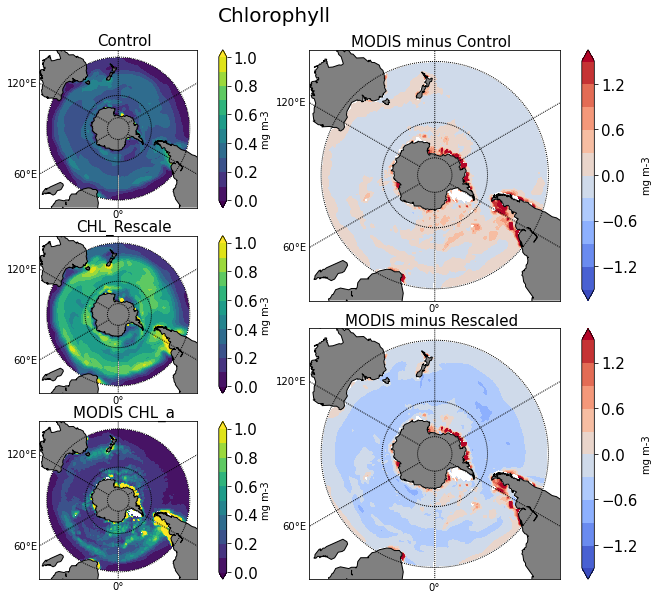

In [14]:
############################# FIGURE 1 ###################################

# -*- coding: utf-8 -*-
"""
Created on Wed Jun 10 13:34:01 2020
MODIFIED ON 01/03/22
@author: ybh10
"""
import glob
import copy
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable

# s
dataset=[]

Variable_type='Chlorophyll' ######## CHANGABLE ATTRIBUTION ########
#Variable_type='Oceanic DMS' ######## CHANGABLE ATTRIBUTION ########


data_for_calculations=[]
if Variable_type == 'Chlorophyll':
    variables_for_calculation='Surface Chlorophyll'
    data_for_calculations= copy.deepcopy(scenarios[:,0,:,:])     
    Scenario_Name=['Control','CHL_Rescale','MODIS CHL_a','MODIS minus Control','MODIS minus Rescaled']
    pre=(np.array(data_for_calculations[2])-np.array(data_for_calculations[0]))
    rescale=(np.array(data_for_calculations[2])-np.array(data_for_calculations[1]))
    dataset.append(data_for_calculations[0]);dataset.append(data_for_calculations[1]);dataset.append((data_for_calculations[2]))
    dataset.append(pre)
    dataset.append(rescale)  
    clevs_scenarios=np.arange(0,1+.1,.1); clevs_diff_control=np.arange(-1.5,1.5+0.3,0.3); 
    clevs_diff_rescale=np.arange(0,3+.2,.2)
    clevs=[clevs_scenarios,clevs_scenarios,clevs_scenarios,clevs_diff_control,clevs_diff_control]
    var_unit='mg m-3'
else:
    variables_for_calculation='Oceanic DMS'
    data_for_calculations= copy.deepcopy(scenarios[:,1,:,:])                     
    Scenario_Name=['Control','Rescale','MODIS_MODEL','MODIS_MODEL minus Control','MODIS_Model minus Rescale']
    pre=(np.array(data_for_calculations[2])-np.array(data_for_calculations[0]))
    rescale=np.array(data_for_calculations[1])-np.array(data_for_calculations[0])
    dataset.append(data_for_calculations[0]);dataset.append(data_for_calculations[1]);dataset.append(data_for_calculations[2])
    dataset.append(pre)
    dataset.append(rescale)  
    clevs_scenarios=np.arange(0,15+1,1); clevs_diff_control=np.arange(-4.5,4.5+1.5,1.5); 
    clevs_diff_rescale=np.arange(0,3+.2,.2)
    clevs=[clevs_scenarios,clevs_scenarios,clevs_scenarios,clevs_diff_control,clevs_diff_control]
    var_unit='nM'

# nums=[0,1,3,5,7,8,9,10]
#     data_in=np.zeros((6,8,75,144,192)) ;  data_in[:]=np.nan
#     model_var=[]
#     for t in range(0,6):
#         for i,l in zip(nums,range(0,8)):
#             #print('models = {}'.format(models[i]))
#             data_in[t,l]=data_for_calculations[t][i]
#             model_var.append(models[i])
            
#(rows, columns, position) #
            #    1  2  3  4
            #    5  6  7  8
            #    9 10 11 12


lat_sh=lats[0:48]
fig = plt.figure(figsize=(20,20), edgecolor='w')
n=12
r=6
ax1 = fig.add_subplot(n,2,(1,3)); ax2 = fig.add_subplot(n,2,(5,7)); ax3 = fig.add_subplot(n,2,(9,11));
ax4 = fig.add_subplot(n,2,(2,6));ax5 = fig.add_subplot(n,2,(8,12))#;ax6 = fig.add_subplot(n,2,6)

axes=[ax1,ax2,ax3,ax4,ax5]
plt.subplots_adjust(hspace=0.43, wspace=-0.60)
#plt.subplots_adjust(hspace=-0.87, wspace=0.2) #### for mercator projection



orig_cmap = matplotlib.cm.Reds

units=['Westerly wind (m s$^-$$^1$)','DMS (ppt)', '(1e$^-$$^9$ kg kg$^-$$^1$)','AOD (550 nm)']
number=['a','b','c','d']
ssa_shift=shifted_cmap_ssa = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
cmaps=['viridis','viridis','viridis','coolwarm','coolwarm']
# 'Column Ozone (DU)',  'AOD (550 nm), W $m^-$$^2$'
for axe,data,name,clev,cmap in zip(axes,dataset,Scenario_Name,clevs,cmaps):
 #   dot=np.nanmean(dotty[10:],axis=(2))
 #  datas=np.nanmean(data[:48],axis=(2)) 
    datas=data[:48]

#     map_ax1 = Basemap(llcrnrlon=0.,llcrnrlat=-85,urcrnrlon=360.,urcrnrlat=-30,
#                     projection='cyl',resolution ='c',ax=axe)  #### for mercator projection###
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=axe)
    x,y  = np.meshgrid(lons,lats[:48])
    x, y = map_ax1(x, y)
    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=10)
    map_ax1.fillcontinents(color='gray')

    Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
#     axe.grid(linestyle='--',alpha=1)
#     axe.set_ylabel('Latitude',fontsize=20)
   # ax4.set_xlabel('Year',fontsize=20)

    y_labels = ['90S','80S','70S','60S','50S','40S']

#     if text == 'SSA' !=-1:
#         vari=blank_space(datas*1e9,-0.25,0.25)
#         cs = axe.contourf(Dates,lat_sh,datas*1e9,clevs_SSA,cmap=ssa_shift,label=unit,extend='both')
#     else:
#         if text == 'SSA_H2SO4' !=-1:
#             cs = axe.contourf(Dates,lat_sh,datas,cmap=color,label=unit,extend='both')
#         else:
    cs = map_ax1.contourf(x,y,datas,clev,cmap=cmap,extend='both')


#     axe.set_xticks(x); axe.set_xticklabels(x,fontsize=15)
#     axe.set_yticks(y); axe.set_yticklabels(y_labels,fontsize=15)
    
#     if text == 'Ozone' !=-1:
#         t=axe.text(1952,-40,'{} - SON'.format(text),color='black',fontsize=22,fontweight='bold')
#     else:    
   # t=axe.text(5,-36,'({})'.format(name),color='black',fontsize=22,fontweight='bold')

    #t.set_bbox(dict(facecolor='white', edgecolor='white'))
    divider = make_axes_locatable(axe)
    cax = divider.append_axes('right', size='5%', pad=0.3)
    cbar=fig.colorbar(cs,cax=cax,extend='both')
    cbar.ax.set_ylabel(var_unit,fontsize=10)
    
    cbar.ax.tick_params(labelsize=15)
    
#     dot=np.array(dot[:,:48])
#     dot=dot.transpose(1,0)
#     [m,n] = np.where(dot==1)
#     z1 = np.zeros(dot.shape)
#     z1[m,n]=99

    plt.suptitle('{}'.format(Variable_type),fontsize=20,y=0.91)
    plt.title('{}'.format(name),fontsize=15,y=.99,x=-12)

   # cs3 = axe.contourf(Dates,lat_sh, z1, 1, hatches=['', '..'], alpha=0)
#plt.suptitle('Zonal Mean: anomalous change from Pre-ODC climatology (1940 - 1960)',y=0.9,fontsize=20)
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/Fig_1_Zonal_Plot_{}.png".format(month),dpi=600,bbox_inches = 'tight')
#plt.savefig("/home/ybh10/CMIP6/Figures/Fig_1_Zonal_MEDIAN.png",dpi=600,bbox_inches = 'tight')

plt.show()
#plt.show()


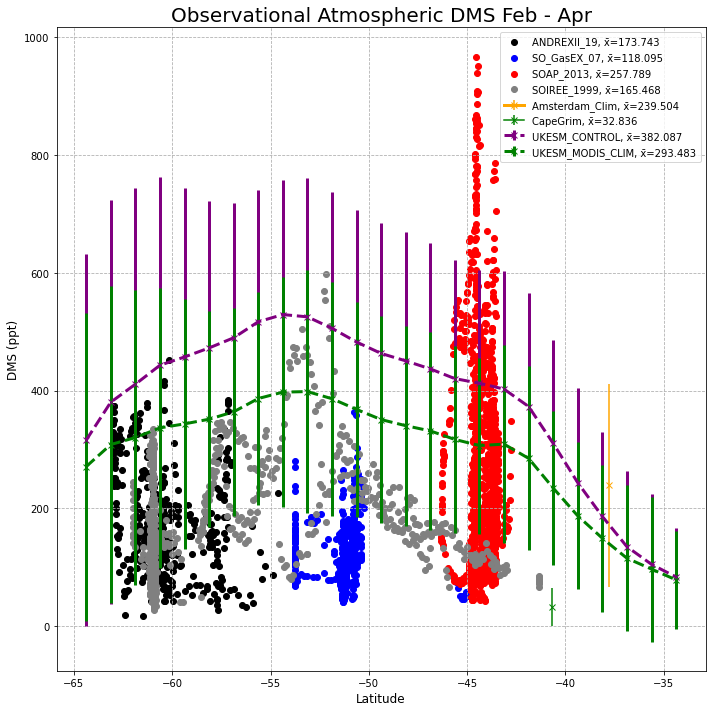

13984

In [21]:
import copy
data_for_calculations= copy.deepcopy(scenarios[:,2,:,:])*(29/62.13)*1e12                      
std_for_calculations=copy.deepcopy(STD_Data[:,2])

fig = plt.figure(figsize=(10,10), edgecolor='w')
ax = fig.add_subplot(1,1,1)
#x=np.arange(40,70,5)
x_tick=np.arange(0,100,5)
AND_DMS=ANDREXII['DMS_air_ppb']*1000
#HadGEM_lat=np.nanmean(Laura_HadGEM_lat[20:45],axis=1)
Control=np.nanmean(data_for_calculations[0][20:45],axis=(1)); Control_std=std_for_calculations[0][20:45]
Lana=np.nanmean(data_for_calculations[3][20:45],axis=(1)); Lana_std=std_for_calculations[3][20:45]
CHL_Rescale=np.nanmean(data_for_calculations[1][20:45],axis=(1)); CHL_Rescale_std=std_for_calculations[1][20:45]
MODIS_CLIM=np.nanmean(data_for_calculations[2][20:45],axis=(1)); MODIS_CLIM_std=std_for_calculations[2][20:45]

ax.set_ylabel('DMS (ppt)',fontsize=12)
ax.set_xlabel('Latitude',fontsize=12)

ax.grid(linestyle='--',alpha=1)
y_labels = ['64S','62S','60S','58S','56S','54S','52S','50S','48S','46S','44S','42S','40S']
#ax.xticks(x_tick)
# ax.set_xticks(x_tick)
# ax.set_xticklabels(y_labels,fontsize=11,rotation=45)
ax.set_title("Observational Atmospheric DMS Feb - Apr",fontsize=20)
ax.scatter(AND_lat,AND_DMS,marker='o',color='black',label='ANDREXII_19, x\u0304={:.3f}'.format(np.nanmean(AND_DMS)))
ax.scatter(SO_GAS[0],SO_GAS[1],marker='o',color='blue',label='SO_GasEX_07, x\u0304={:.3f}'.format(np.nanmean(SO_GAS[1])))
ax.scatter(CIMS_lat,CIMS_DMS,marker='o',color='red',label='SOAP_2013, x\u0304={:.3f}'.format(np.nanmean(CIMS_DMS)))
ax.scatter(SOIREE_lat,SOIREE_DMS,marker='o',color='gray',label='SOIREE_1999, x\u0304={:.3f}'.format(np.nanmean(SOIREE_DMS)))
ax.errorbar(-37.8,np.nanmean(AMSTERDAM_CLIM_DMS[1:4]),yerr=np.nanmean(AMSTERDAM_std[1:4])
            ,marker='x',color='orange',label='Amsterdam_Clim, x\u0304={:.3f}'.format(np.nanmean(AMSTERDAM_CLIM_DMS[1:4])),LineWidth=3)
#ax.scatter(-40.68,np.nanmean(CapeGrim_CLIM['DMS'][1:4]),marker='x',color='green',label='CapeGrim, x\u0304={:.3f}'.format(np.nanmean(SOIREE_DMS)))
ax.errorbar(-40.68,np.nanmean(CapeGrim_std['DMS'][1:4]),yerr=np.nanmean(CapeGrim_std['DMS'][1:4]),marker='x',color='green',label='CapeGrim, x\u0304={:.3f}'.format(np.nanmean(CapeGrim_std['DMS'][1:4])))
ax.errorbar(lats[20:45],Control,yerr=(Control_std),marker='x',color='purple',linestyle='--',linewidth=3,label='UKESM_CONTROL, x\u0304={:.3f}'.format(np.nanmean(Control)))
#ax.errorbar(lats[20:45],CHL_Rescale,yerr=(CHL_Rescale_std),marker='x',color='pink',linestyle='--',linewidth=3,label='UKESM_CHL_Rescale, x\u0304={:.3f}'.format(np.nanmean(CHL_Rescale)))
ax.errorbar(lats[20:45],MODIS_CLIM,yerr=(MODIS_CLIM_std),marker='x',color='g',linestyle='--',linewidth=3,label='UKESM_MODIS_CLIM, x\u0304={:.3f}'.format(np.nanmean(MODIS_CLIM)))
#ax.errorbar(lats[20:45],Lana,yerr=(Lana_std),marker='x',color='gray',linestyle='--',linewidth=3,label='LANA, x\u0304={:.3f}'.format(np.nanmean(MODIS_CLIM)))

#ax.errorbar(lats[20:45],HadGEM_DMS_SO,yerr=(HadGEM_DMS_SO_std),marker='x',color='violet',linestyle='--',linewidth=3,label='HadGEM_CMIP6, x\u0304={:.3f}'.format(np.nanmean(HadGEM_DMS_SO)))
#ax.errorbar(lats[20:45],UKESM1_DMS_SO,yerr=(UKESM1_DMS_SO_std),marker='x',color='rebeccapurple',linestyle='--',linewidth=3,label='UKESM1_CMIP6, x\u0304={:.3f}'.format(np.nanmean(UKESM1_DMS_SO)))

plt.legend()
plt.tight_layout()
plt.show()
gc.collect()
#plt.savefig("/home/ybh10/Observational_Data/Plots/Observational_Atmospheric_DMS_Feb-Apr.png",dpi=600,bbox_inches = 'tight')


/nesi/project/niwa02757/ybh10/miniconda3/envs/master/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-173-5cd99efc8e9e>:7: RuntimeWarning: Mean of empty slice
  chl_std=np.nanmean(chl_std,axis=1)
<ipython-input-173-5cd99efc8e9e>:17: RuntimeWarning: Mean of empty slice
  MODIS_CLIM=np.nanmean(data_for_calculations[2][lower_lat:upper_lat],axis=(1))


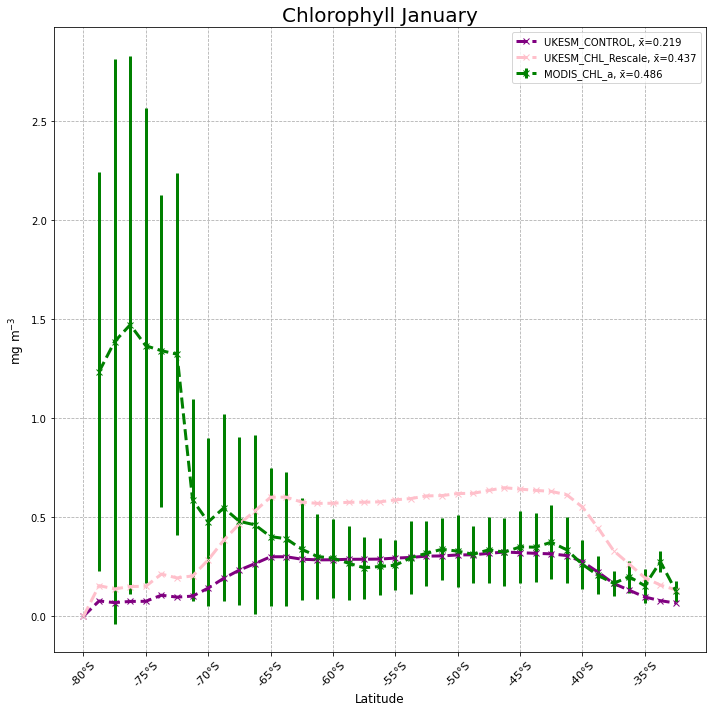

3319

In [173]:
import copy
upper_lat=47
lower_lat=8
data_for_calculations= copy.deepcopy(scenarios[:,0,:,:])                    
std_for_calculations=copy.deepcopy(STD_Data[:,0])
chl_std=np.nanstd(chl_modis[:,lower_lat:upper_lat],axis=0)
chl_std=np.nanmean(chl_std,axis=1)
fig = plt.figure(figsize=(10,10), edgecolor='w')
ax = fig.add_subplot(1,1,1)
#x=np.arange(40,70,5)
x_tick=np.arange(0,100,5)
#HadGEM_lat=np.nanmean(Laura_HadGEM_lat[20:45],axis=1)
Control=np.nanmean(data_for_calculations[0][lower_lat:upper_lat],axis=(1))

Lana=np.nanmean(data_for_calculations[3][lower_lat:upper_lat],axis=(1))
CHL_Rescale=np.nanmean(data_for_calculations[1][lower_lat:upper_lat],axis=(1))
MODIS_CLIM=np.nanmean(data_for_calculations[2][lower_lat:upper_lat],axis=(1))

ax.set_ylabel('mg m$^{-3}$',fontsize=12)
ax.set_xlabel('Latitude',fontsize=12)

ax.grid(linestyle='--',alpha=1)
ax.set_title("Chlorophyll January",fontsize=20)


ticks=np.arange(lats[lower_lat],lats[upper_lat],5)             
tick_label=[]
for i in range(0,len(ticks)): ####### Creates latitude labels #######
    tick_label.append('{}\N{DEGREE SIGN}S'.format(math.floor(ticks[i]))) ## Round numbers to nearest 5 multiple 

ax.plot(lats[lower_lat:upper_lat],Control,marker='x',color='purple',linestyle='--',linewidth=3,label='UKESM_CONTROL, x\u0304={:.3f}'.format(np.nanmean(Control)))
ax.plot(lats[lower_lat:upper_lat],CHL_Rescale,marker='x',color='pink',linestyle='--',linewidth=3,label='UKESM_CHL_Rescale, x\u0304={:.3f}'.format(np.nanmean(CHL_Rescale)))
ax.errorbar(lats[lower_lat:upper_lat],MODIS_CLIM,yerr=(chl_std),marker='x',color='g',linestyle='--',linewidth=3,label='MODIS_CHL_a, x\u0304={:.3f}'.format(np.nanmean(MODIS_CLIM)))

ax.set_xticks(ticks)
ax.set_xticklabels(tick_label,fontsize=11,rotation=45)

plt.legend()
plt.tight_layout()
plt.show()
gc.collect()
#plt.savefig("/home/ybh10/Observational_Data/Plots/Observational_Atmospheric_DMS_Feb-Apr.png",dpi=600,bbox_inches = 'tight')
